In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Project Objective
Predicting annual salary in dollars for data science positions based on various data such as role definition, location, company size, and employee location

### Reading Data From Source

In [122]:
data = pd.read_csv('SalarayDataSet/ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Describing Features

**work_year**: The year the salary was paid.
**experience_level**: The experience level in the job during the year
**employment_type**: The type of employment for the role
**job_title**: The role worked in during the year.
**salary**: The total gross salary amount paid.
**salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
**salary_in_usd**: The salary in USD
**employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
**remote_ratio**: The overall amount of work done remotely
**company_location**: The country of the employer's main office or contracting branch
**company_size**: The median number of people that worked for the company during the year

### Data Cleaning

In [123]:
# No Nan values so no action should be done
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### EDA

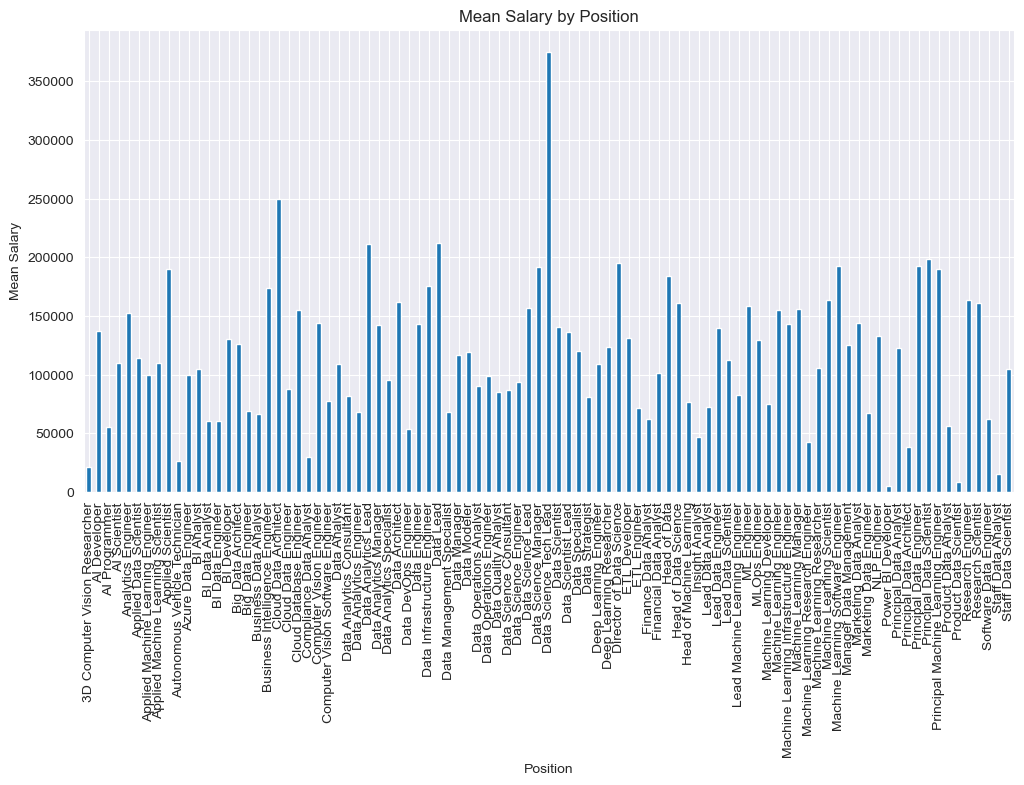

In [127]:
mean_salary_by_position = data.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(12,6))
mean_salary_by_position.plot(kind='bar')
plt.title('Mean Salary by Position')
plt.xlabel('Position')
plt.ylabel('Mean Salary')
plt.show()

In [125]:
job_title_counts = data['job_title'].value_counts()
pd.DataFrame(job_title_counts)

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
...,...
Principal Machine Learning Engineer,1
Azure Data Engineer,1
Manager Data Management,1


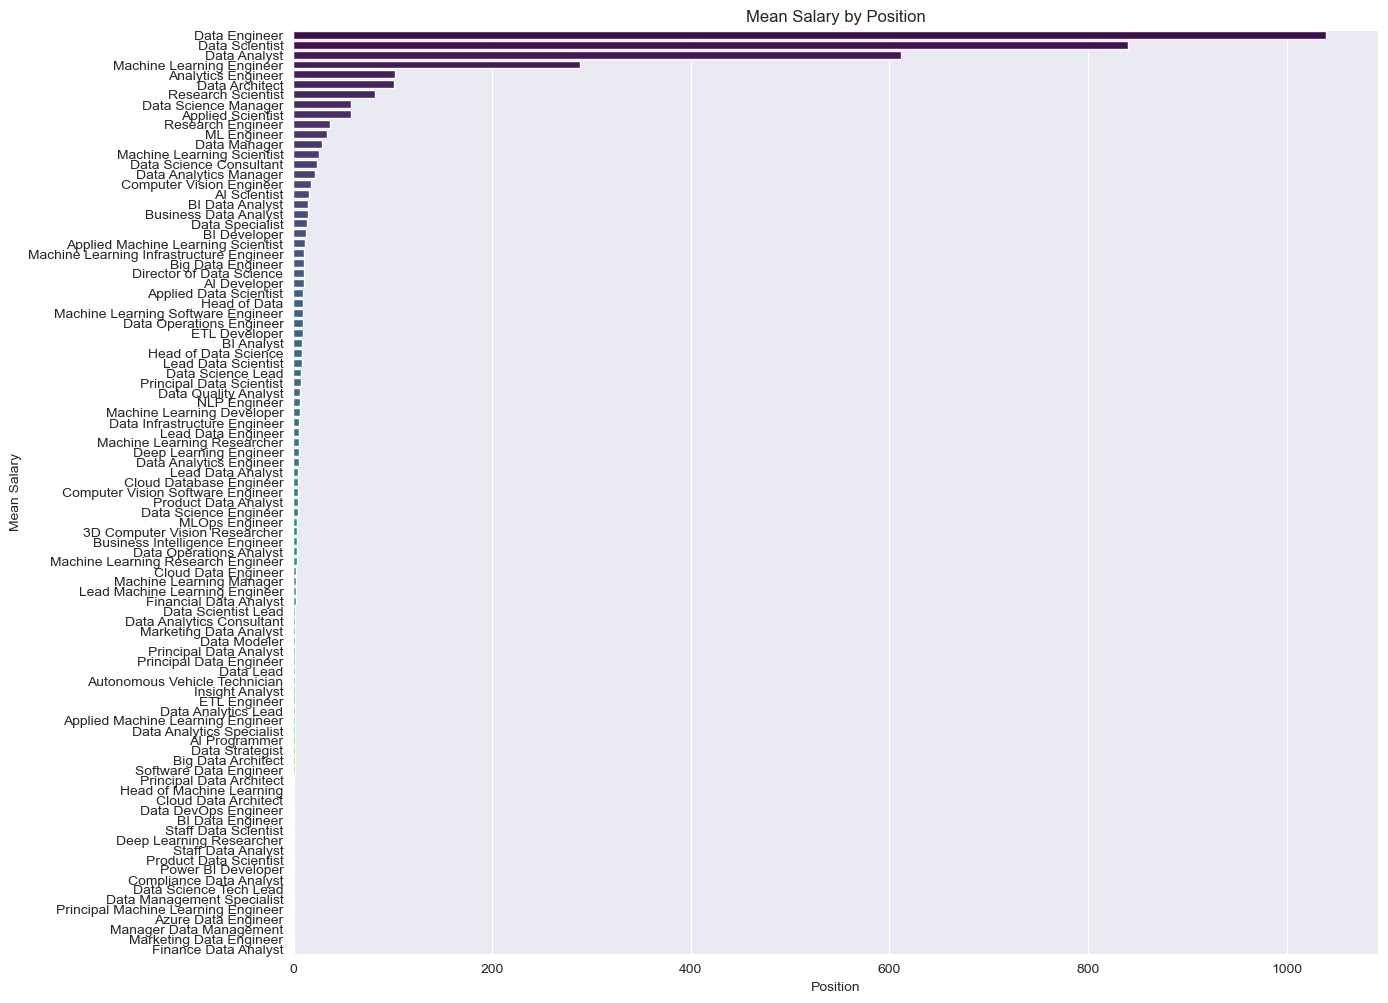

In [126]:
plt.figure(figsize=(14,12))
job_title_counts = data['job_title'].value_counts().reset_index()

sns.barplot(x='count', y='job_title', data=job_title_counts, palette='viridis')
plt.title('Mean Salary by Position')
plt.xlabel('Position')
plt.ylabel('Mean Salary')
plt.show()

### Preprocessing
Converting categorical features to numerical using encoding methods

In [108]:
# let's look which features are not numerical and should be converted
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


We can observe that the data set has 7 not numerical features which should be converted:
 experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, and company_size

In [109]:
label_encoder = LabelEncoder()

# Creating a list of all categorical columns
columns_to_encode = [column for column in data.columns if data[column].dtype == 'object']

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [110]:
for column in columns_to_encode:
    print(column,
          ", ",data[column].nunique())

experience_level ,  4
employment_type ,  4
job_title ,  93
salary_currency ,  20
employee_residence ,  78
company_location ,  72
company_size ,  3


In [111]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70,0
3751,2021,2,2,84,151000,19,151000,75,100,70,0
3752,2020,0,2,47,105000,19,105000,75,100,70,2
3753,2020,0,0,17,100000,19,100000,75,100,70,0


### Train-Test Split

In [112]:
data_X, salary_in_usd = data.drop(['salary_in_usd'], axis=1), data['salary_in_usd']

In [113]:
#Creating train,test and validation sets
x_train, x_rest, y_train, y_rest = train_test_split(data_X, salary_in_usd, train_size=0.8)
x_test, x_valid, y_test, y_valid = train_test_split(x_rest, y_rest, train_size=0.5)